# Objectives

Pixel Transforms are operations you perform one pixel at a time. In this lab, you will start by creating histograms. Histograms display the intensity of the image and can be used to optimize image characteristics. You will then apply Intensity Transformations, making objects easier to see by improving image contrast and brightness. In the last portion of the lab, you will use thresholding to segment objects from images.

    Pixel Transforms
        Histograms
        Intensity Transformations
        Thresholding and Simple Segmentation


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
# create a helper fn to plot an image side by side

def plot_img(img1,img2,title1='org img',title2='new img'):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(img1,cmap='gray')
    plt.title(title1)
    plt.subplot(1,2,2)
    plt.imshow(img2,cmap='gray')
    plt.title(title2)
    plt.show()

In [4]:
# helper fn to plot 2 histograms side by side

def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

# Histograms

Counts the no.of occurences of the intensity vals of pixels

We use cv.calcHist() to generate the histogram. Here are the parameter values:

cv2.calcHist(CV array:[image] this is the image channel:[0],for this course it will always be [None],the number of bins:[L],the range of index of bins:[0,L-1]) 
For real images, L is 256. 

Toy Example

Consider the toy array with intensity values ranging from 0 to 2. We can create a histogram. Its first element is the number of zeros in the image (in this case, 1); its second element is the number of ones in the image (in this case, 5), and so on.


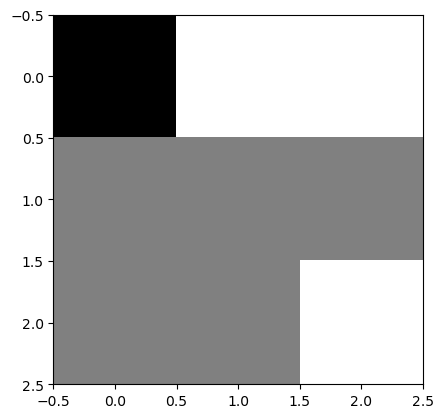

In [7]:
toy_image=np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(toy_image,cmap='gray')
plt.show()


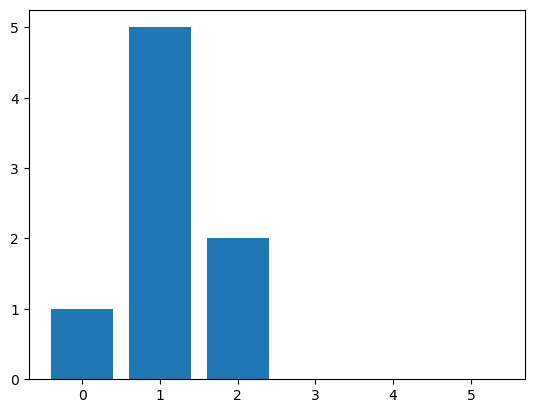

In [8]:
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

In [9]:
# concept. iterating through list in one line
# “For each x in range(4), collect x into a new list.”
[x for x in range(4)]


[0, 1, 2, 3]

In [10]:
[x for x in range(10) if x % 2 == 0]

[0, 2, 4, 6, 8]

In [11]:
# concept= plt.bar([x,y]) axis
#plt.bar([1,2,3,4,5,6],[1,5,2,4,1,9]) 


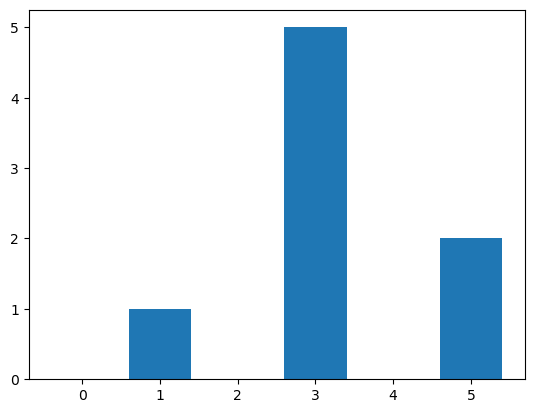

In [12]:
plt.bar([x for x in range(6)],[0,1,0,5,0,2])
plt.show()



# Gray Scale Histograms

Histograms are used in grayscale images. Grayscale images are used in many applications, including medical and industrial. Color images are split into luminance and chrominance. The luminance is the grayscale portion and is usually processed in many applications. Consider the following "Gold Hill" image:



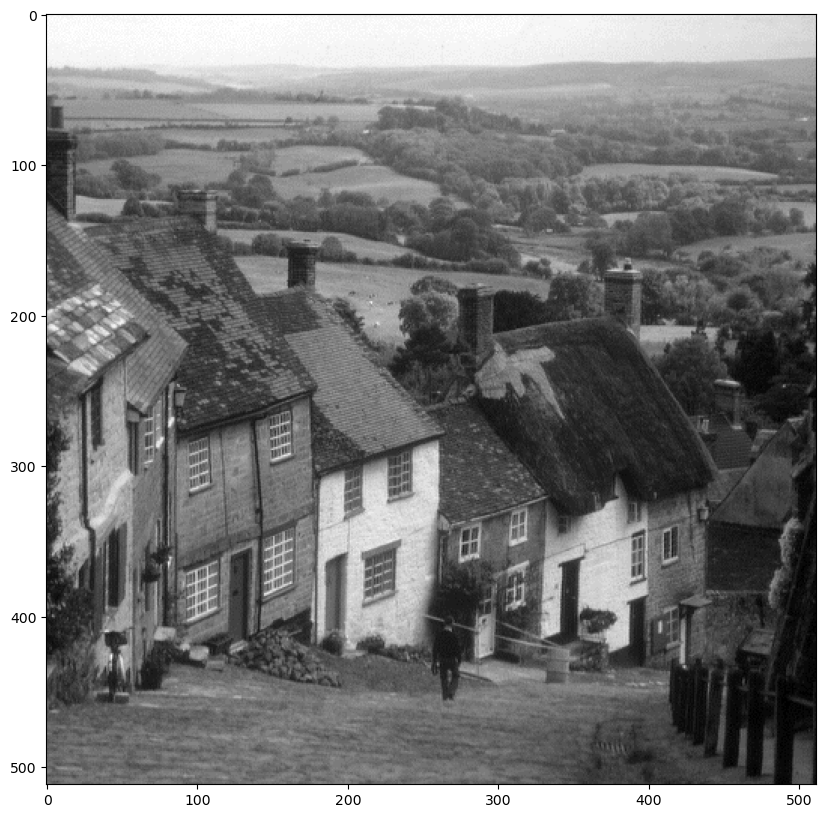

[[228 228 236 ... 204 196 204]
 [228 228 228 ... 196 204 196]
 [228 236 236 ... 196 204 196]
 ...
 [100 108 108 ...  68  44  28]
 [100 116 108 ...  68  36  28]
 [116 116 116 ...  76  44  28]]


In [14]:
goldhill=cv2.imread('goldhill.bmp',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(goldhill,cmap='gray')
plt.show()
print(goldhill)

In [15]:
hist=cv2.calcHist([goldhill],[0],None,[256],[0,256]) # goldhill contains numpy array, x and y axis

print(type([goldhill])) # this is a list
print(type(goldhill)) # this is a numpy array

print(goldhill.shape)

# for i in range(50,80):
#      print(hist[i])

type(hist) 
print(hist)
print(hist.shape)


<class 'list'>
<class 'numpy.ndarray'>
(512, 512)
[[    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [  564.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [ 3696.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [ 4730.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [ 8990.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [12883.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [13356.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [14592.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [15688.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [15632.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [16169.]
 [    0.]
 [    0.]


[    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   564.     0.     0.     0.     0.     0.     0.     0.  3696.     0.
     0.     0.     0.     0.     0.     0.  4730.     0.     0.     0.
     0.     0.     0.     0.  8990.     0.     0.     0.     0.     0.
     0.     0. 12883.     0.     0.     0.     0.     0.     0.     0.
 13356.     0.     0.     0.     0.     0.     0.     0. 14592.     0.
     0.     0.     0.     0.     0.     0. 15688.     0.     0.     0.
     0.     0.     0.     0. 15632.     0.     0.     0.     0.     0.
     0.     0. 16169.     0.     0.     0.     0.     0.     0.     0.
 17621.     0.     0.     0.     0.     0.     0.     0. 19310.     0.
     0.     0.     0.     0.     0.     0. 20039.     0.     0.     0.
     0.     0.     0.     0. 17865.     0.     0.     0.     0.     0.
     0.     0. 13084.     0.     0.     0.     0.     0.     0.     0.
 10120

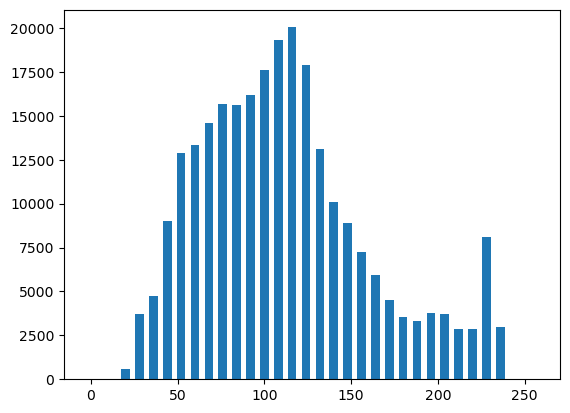

In [16]:
# another way of writing  
plt.bar([x for x in range(hist.shape[0])],hist[:,0],width=5)
print(hist[:,0]) # contains the intensity val for each pixel

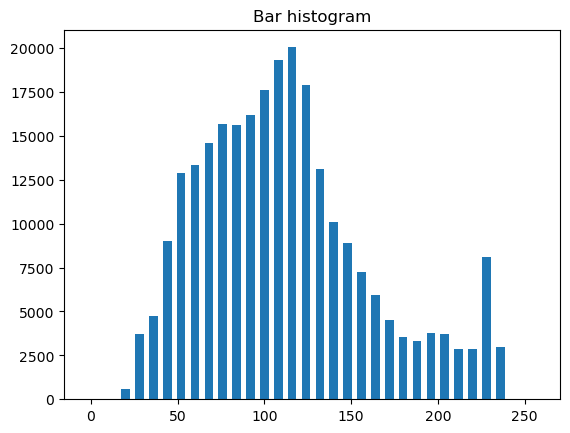

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [17]:
# plot as a bar graph, x is pixel intensities and y axis is the no. of times of occurences

intensity_vals=np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_vals,hist[:,0],width=5)
plt.title('Bar histogram')
plt.show()

print(intensity_vals,type(intensity_vals))
print(intensity_vals.shape)
print(hist.shape)

In [18]:
#The histogram is a function where ℎ[𝑟] where 𝑟∈0,1,..,255

#We can convert it to a probability mass function by normalizing it by the number of pixels

# 1 pixel/the total no. of pixels

PMF=hist/(goldhill.shape[0]*goldhill.shape[1]) # 0/imagesize,594/imagesize,etc

print(PMF,'pmf')
print(hist)
print(('g',goldhill.shape[0]*goldhill.shape[1])) # this is the shape of the img-512*512

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.00215149]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.01409912]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.01804352]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.03429413]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.04914474]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.0509491 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.05566406]
 [0.        ]
 [0.        ]
 [0.  

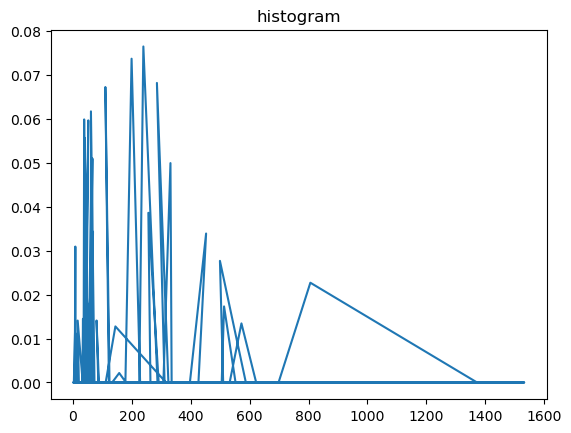

In [113]:
# plot as cont. fn

plt.plot(hist,PMF)
plt.title('histogram')
plt.show()

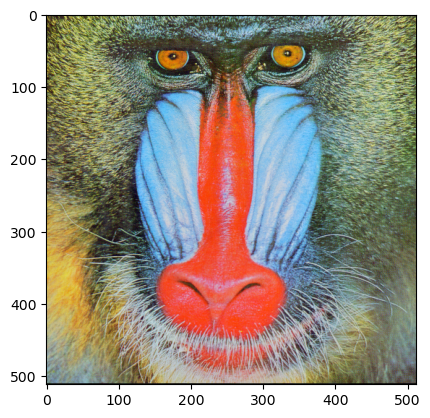

In [20]:
# apply histgm to each image color channel

baboon=cv2.imread('baboon.png')
plt.imshow(cv2.cvtColor(baboon,cv2.COLOR_BGR2RGB))
plt.show()

0 blue
<class 'tuple'>
[[6.900e+01]
 [2.600e+01]
 [3.800e+01]
 [5.400e+01]
 [5.500e+01]
 [8.400e+01]
 [1.060e+02]
 [1.170e+02]
 [1.170e+02]
 [1.510e+02]
 [1.960e+02]
 [2.250e+02]
 [2.250e+02]
 [2.580e+02]
 [2.910e+02]
 [3.340e+02]
 [3.490e+02]
 [3.940e+02]
 [4.190e+02]
 [4.660e+02]
 [4.730e+02]
 [5.120e+02]
 [5.450e+02]
 [6.330e+02]
 [5.930e+02]
 [6.740e+02]
 [7.430e+02]
 [7.960e+02]
 [8.120e+02]
 [8.620e+02]
 [8.630e+02]
 [9.980e+02]
 [1.024e+03]
 [1.089e+03]
 [1.103e+03]
 [1.147e+03]
 [1.201e+03]
 [1.236e+03]
 [1.341e+03]
 [1.395e+03]
 [1.360e+03]
 [1.399e+03]
 [1.451e+03]
 [1.607e+03]
 [1.600e+03]
 [1.688e+03]
 [1.736e+03]
 [1.776e+03]
 [1.874e+03]
 [1.831e+03]
 [1.791e+03]
 [1.911e+03]
 [1.897e+03]
 [1.922e+03]
 [1.950e+03]
 [1.818e+03]
 [1.995e+03]
 [2.028e+03]
 [2.049e+03]
 [1.957e+03]
 [2.063e+03]
 [1.884e+03]
 [2.047e+03]
 [2.081e+03]
 [2.038e+03]
 [2.034e+03]
 [1.948e+03]
 [1.859e+03]
 [1.909e+03]
 [1.898e+03]
 [2.038e+03]
 [1.972e+03]
 [1.861e+03]
 [1.941e+03]
 [1.898e+03]
 [

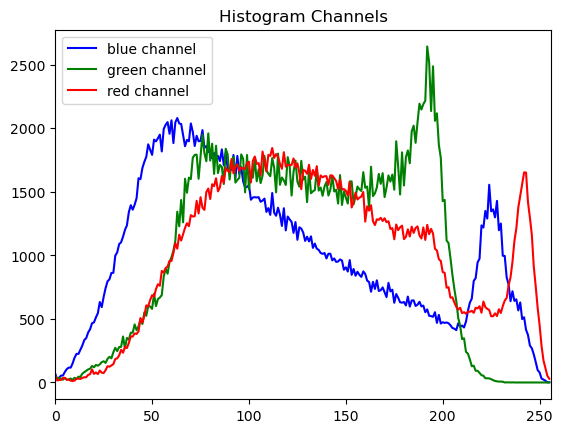

In [115]:
color = ('blue','green','red') # this for the channels
for i,col in enumerate(color): # enum enable index number
    print(i,col)
    print(type(color))
    histr = cv2.calcHist([baboon],[i],None,[256],[0,256])
    plt.plot(intensity_vals,histr,color = col,label=col+" channel")
    plt.xlim([0,256])
    
plt.legend()
plt.title("Histogram Channels")
plt.show()

# Intensity Trnsformations

It's helpful to think of an image as a function 𝑓(𝑥,𝑦) instead of an array at this point, where x is the row index and y is the column index. You can apply a transformation 𝑇 to the image and get a new image:
𝑔(𝑥,𝑦)=𝑇(𝑓(𝑥,𝑦))

An Intensity Transformation depends on only one single point (𝑥,𝑦)
. For example, you can apply a linear transform 𝑔(𝑥,𝑦)=2𝑓(𝑥,𝑦)+1

; this will multiply each image pixel by two and add one.

As the Intensity transforms only depend on one value; as a result, it is sometimes referred to as a gray-level mapping.
The variable if 𝑟 is the gray level intensity, similar to the histogram values. The new output s is given by:

𝑠=𝑇(𝑟)

# Image Negatives

In [24]:
# We can perform intensity transformation on the toy image where 𝐿=3

neg_toy_image=-1*toy_image+255
print("toy image\n",toy_image)
print('image_negative',neg_toy_image)

toy image
 [[0 2 2]
 [1 1 1]
 [1 1 2]]
image_negative [[255 253 253]
 [254 254 254]
 [254 254 253]]


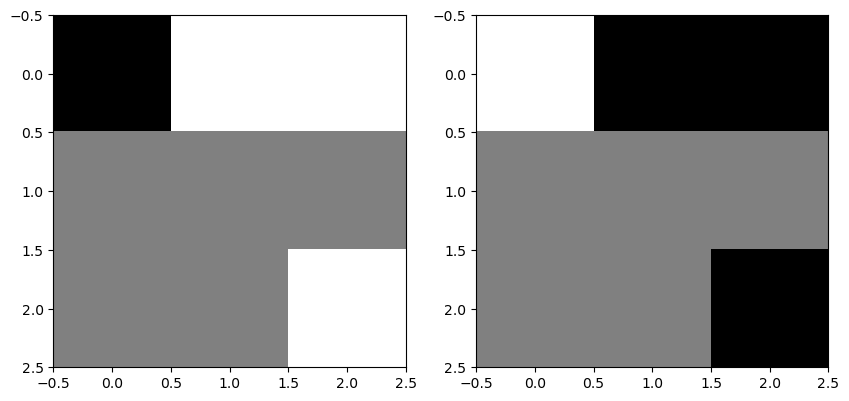

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(toy_image,cmap='gray')
plt.subplot(122)
plt.imshow(neg_toy_image,cmap='gray')
plt.show()

In [26]:
# hist and small np array concept for self study

n=np.array([[1],[2],[3],[4],[5],[6]],dtype=np.uint8)
print(n.shape)
d=n/(n.shape[0]*n.shape[1])
print(n)
print(n.shape[0]*n.shape[1])
print(d,'d')

print(n[:,0])

([x for x in range(n.shape[0])])

his = cv2.calcHist([n], [0], None, [7], [0, 7])
print(his)
pmf=his/n.shape[0]*n.shape[1]
print('pmf',pmf)
f=n.flatten()
print(type(f))
print(type([n]))
print(type[f])
print(f.shape)



(6, 1)
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
6
[[0.16666667]
 [0.33333333]
 [0.5       ]
 [0.66666667]
 [0.83333333]
 [1.        ]] d
[1 2 3 4 5 6]
[[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
pmf [[0.        ]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]]
<class 'numpy.ndarray'>
<class 'list'>
type[array([1, 2, 3, 4, 5, 6], dtype=uint8)]
(6,)


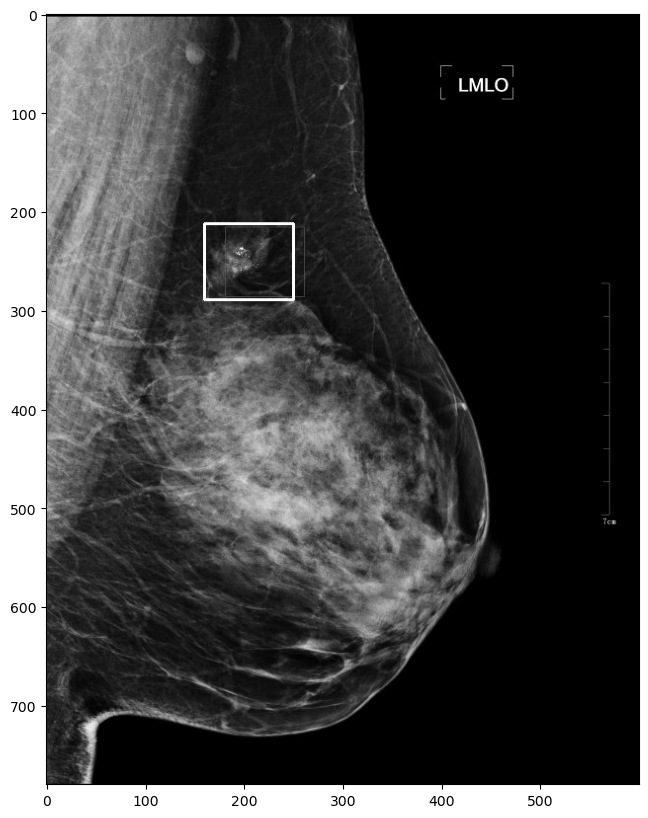

In [27]:
# Reversing image intensity has many applications, including making it simpler to analyze medical images. 
# Consider the mammogram with micro-calcifications on the upper quadrant:

image_mammo=cv2.imread('mammogram.png',cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image_mammo,pt1=(160,212),pt2=(250,289),color=(255),thickness=2)
plt.figure(figsize=(10,10))
plt.imshow(image_mammo,cmap='gray')
plt.show()

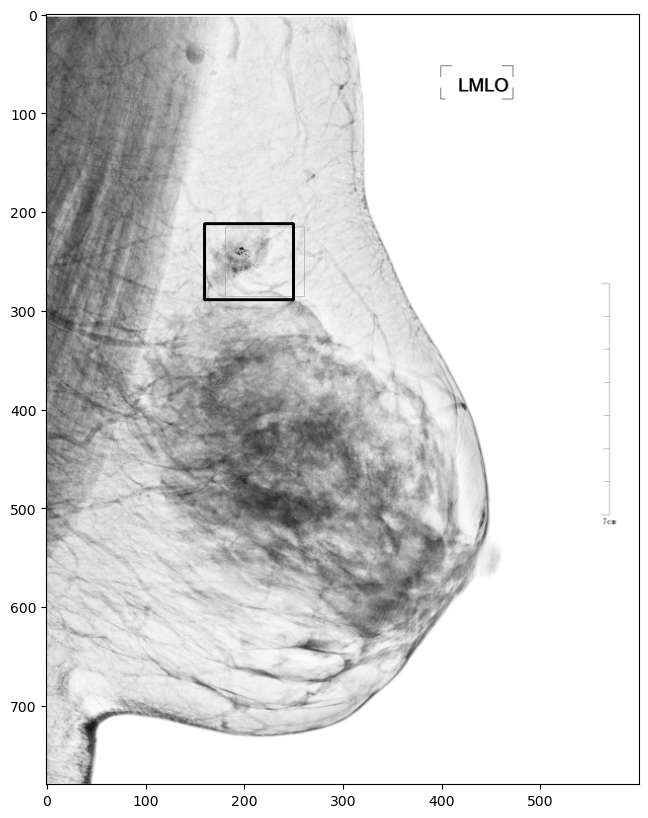

In [28]:
# apply the intensity transfomn

img_neg=-1*image_mammo+255  # eg, for intensity val 252=> -252+255=3, becomes darker

plt.figure(figsize=(10,10))
plt.imshow(img_neg, cmap = "gray")
plt.show()

#We see the micro-calcifications in the image negatives is easier it is to analyze:


# Brightness and contrast adjustments

We can use multiplication by 𝛼
for contrast control and addition by 𝛽 to improve brightness control. This applies the Intensity Transformation as well. The image is 𝑓(𝑥,𝑦) and the transformed image is 𝑔(𝑥,𝑦), where 𝑔(𝑥,𝑦)=𝛼𝑓(𝑥,𝑦)+𝛽

.

Rather than implementing via array operations, we use the function convertScaleAbs. It scales, calculates absolute values, and converts the result to 8-bit so the values fall between [0,255]
. For brightness control, we can set 𝛼 to 1 and 𝛽 to 100: Remember the Good Hill image, it’s dark and hazy so let's see if we can improve it. 

In [30]:
alpha=1 # simple contrast control
beta=100 # simple brightnesscontrol
new_img=cv2.convertScaleAbs(goldhill,alpha=alpha,beta=beta)

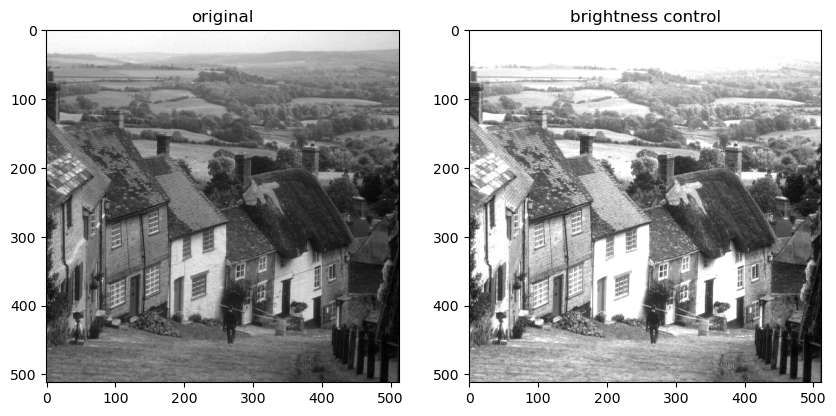

In [31]:
# plot the brighter image

plot_img(goldhill,new_img,title1='original',title2='brightness control')


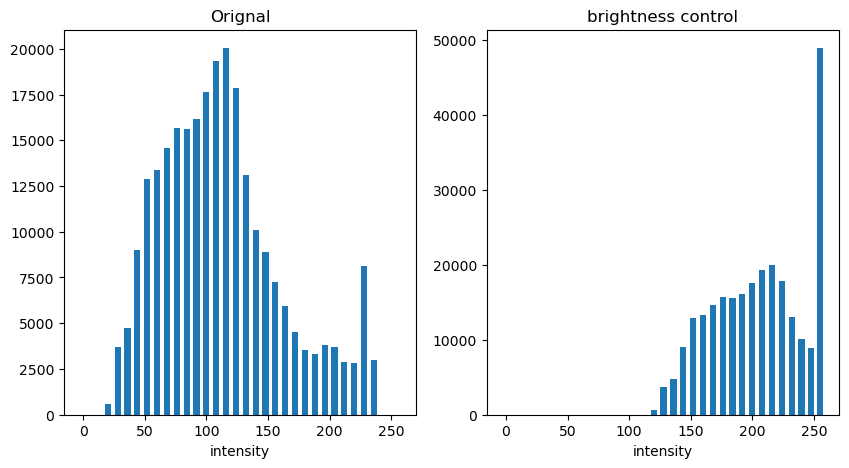

In [32]:
plt.figure(figsize=(10,5))
plot_hist(goldhill,new_img,"Orignal","brightness control")

In [33]:
plt.figure(figsize=(10,5))
alpha = 3 # Simple contrast control
beta = -200  # Simple brightness control   
new_img= cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 1000x500 with 0 Axes>

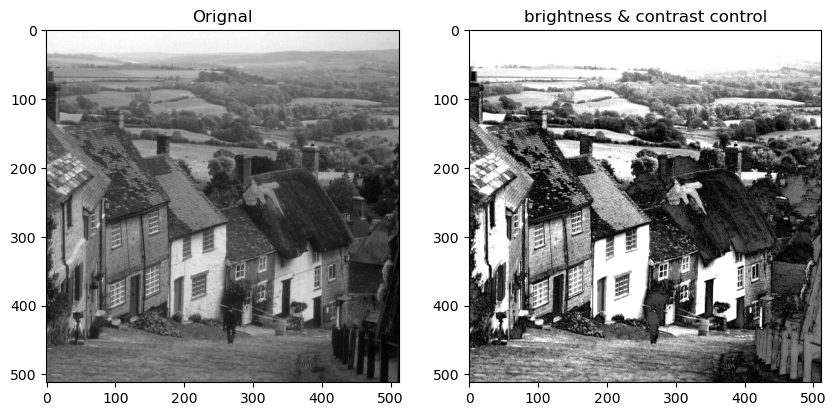

In [34]:
plot_img(goldhill, new_img, "Orignal", "brightness & contrast control")

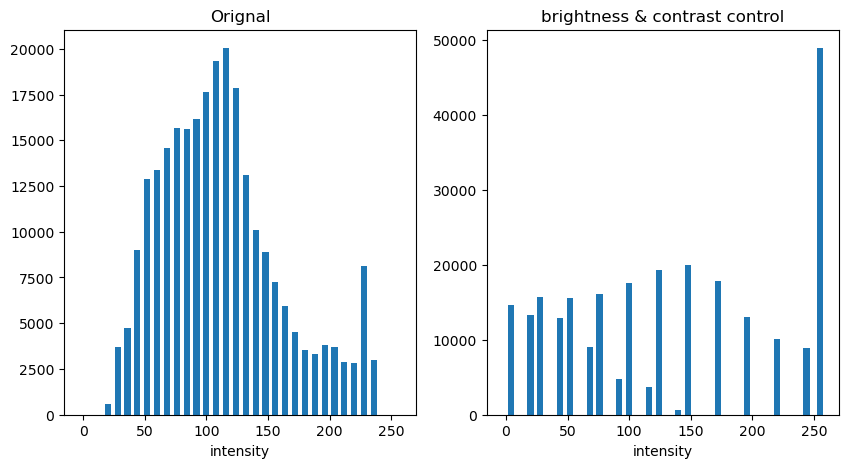

In [35]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_img, "Orignal", "brightness & contrast control")

# Histogram Equalization

HE increases the contrast of images by stretching out the range of the grayscale pixels, it does this by flattening the histogram, 
apply the fn:
cv2.equalizeHist



In [37]:
zelda=cv2.imread('zelda.png',cv2.IMREAD_GRAYSCALE)
new_image=cv2.equalizeHist(zelda)

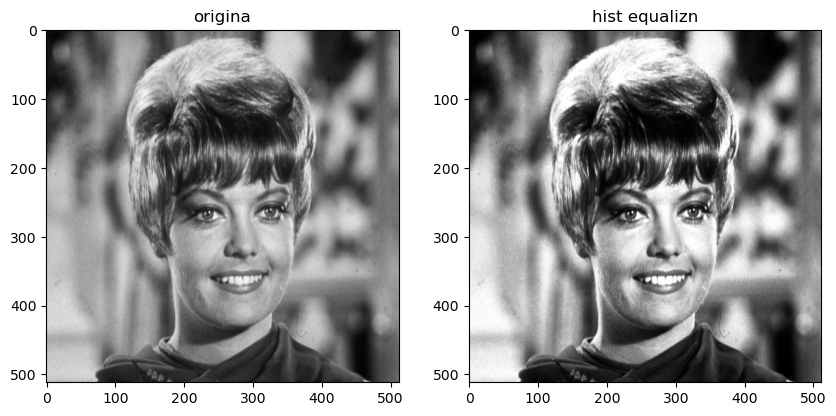

In [38]:
plot_img(zelda,new_image,'origina','hist equalizn')

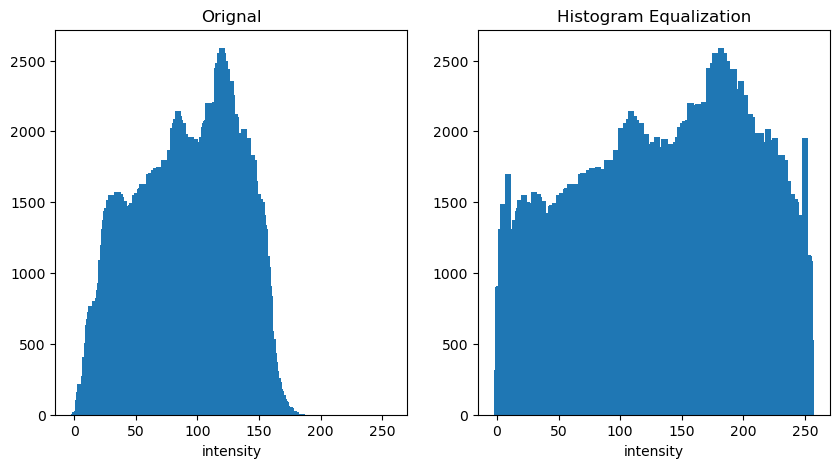

In [39]:
plt.figure(figsize=(10,5))
plot_hist(zelda, new_image,"Orignal","Histogram Equalization")

#contrast is improved after the Histogram Equalization is applied the histogram is stretched out:

# Thresholding and Simple Segmentation

Thresholding is used in image segmentation this means extracting objects from an image. Image segmentation is used in many applications including extracting text, medical imaging, and industrial imaging. Thresholding an image takes a threshold; If a particular pixel (i,j) is greater than that threshold it will set that pixel to some value usually 1 or 255, otherwise, it will set it to another value, usually zero. We can write a Python function that will perform thresholding and output a new image given some input grayscale image:


In [41]:
def thresholding(input_img,threshold,max_val=255,min_val=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)

    for i in range(N):
        for j in range(M):
            if input_img[i,j]>threshold:
                image_out[i,j]=max_val

            else:
                image_out[i,j]=min_val

    return image_out

In [42]:
toy_image

array([[0, 2, 2],
       [1, 1, 1],
       [1, 1, 2]], dtype=uint8)

In [43]:
threshold=1
max_val=2
min_val=0

thresholding_toy=thresholding(toy_image,threshold=threshold,max_val=max_val,min_val=min_val)
thresholding_toy



array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

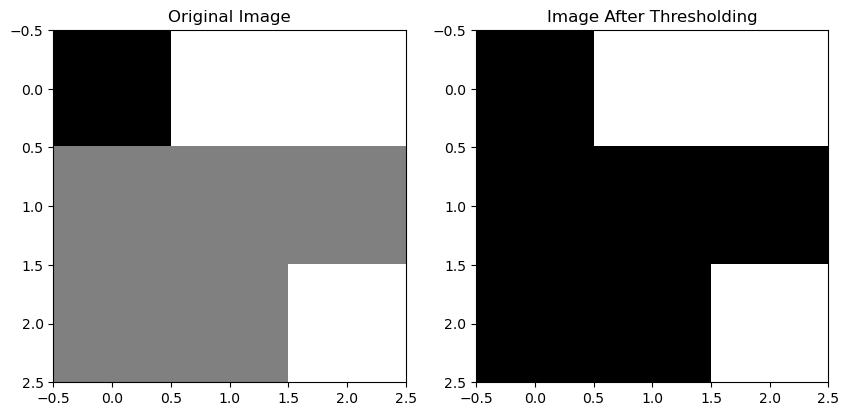

In [44]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(toy_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_toy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

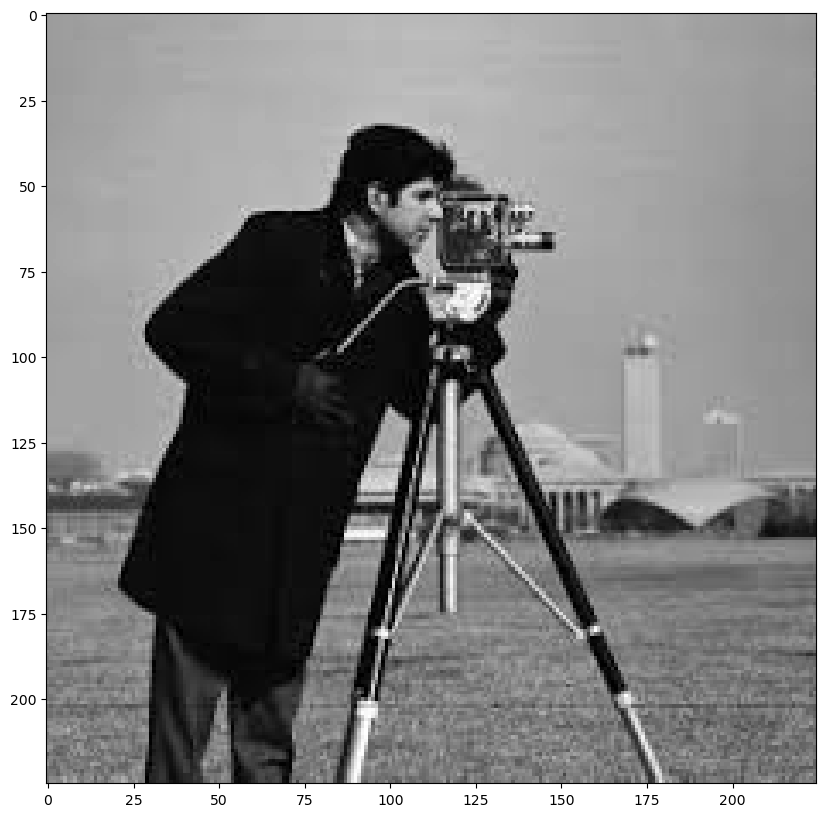

In [45]:
# with cameraman image

image = cv2.imread("cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap="gray")
plt.show()

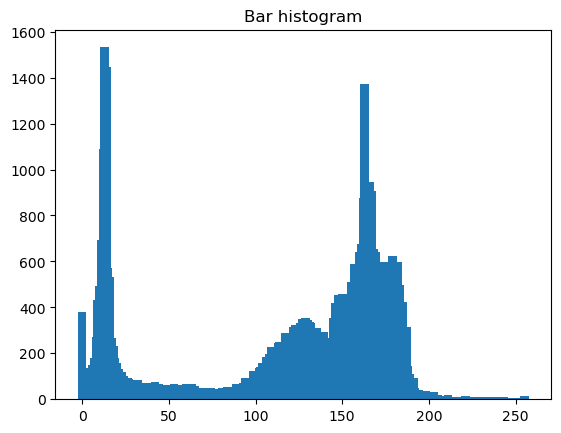

In [46]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.bar(intensity_vals, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()



In [47]:
threshold=87
max_val=255
min_val=0
new_image = thresholding(image,87,255,0)

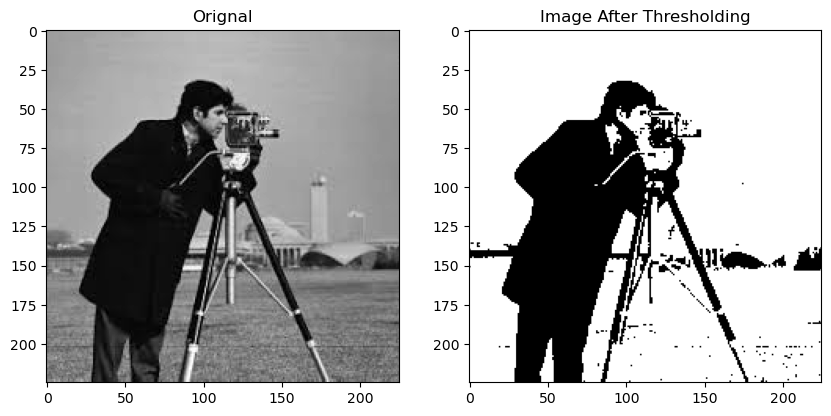

In [48]:
plot_img(image, new_image, "Orignal", "Image After Thresholding")

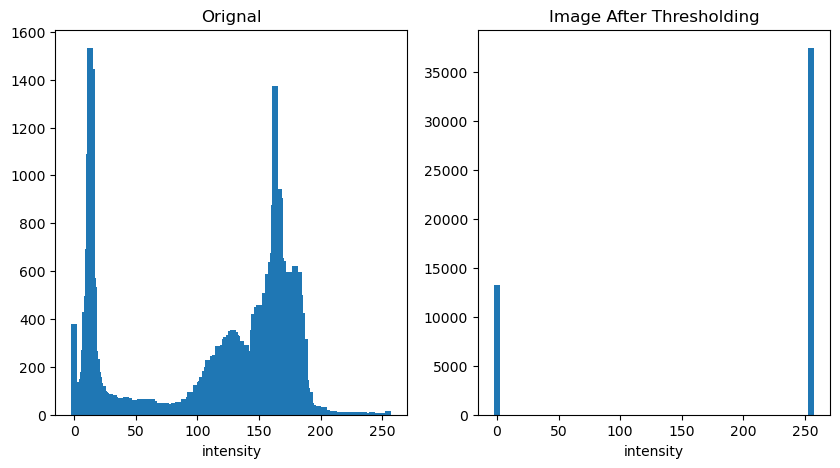

In [49]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Image After Thresholding")

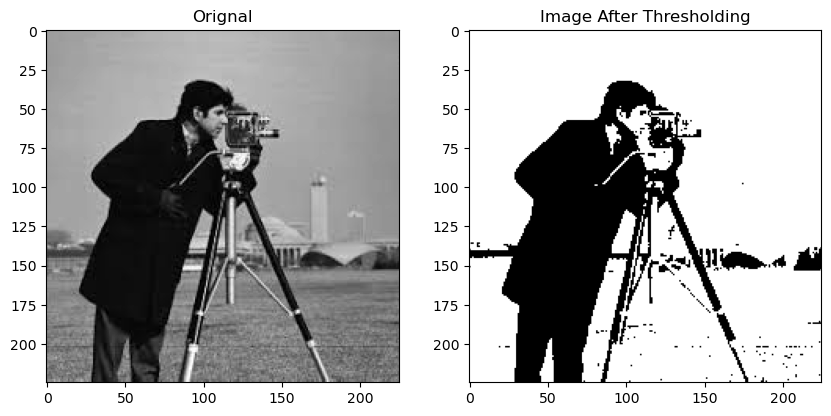

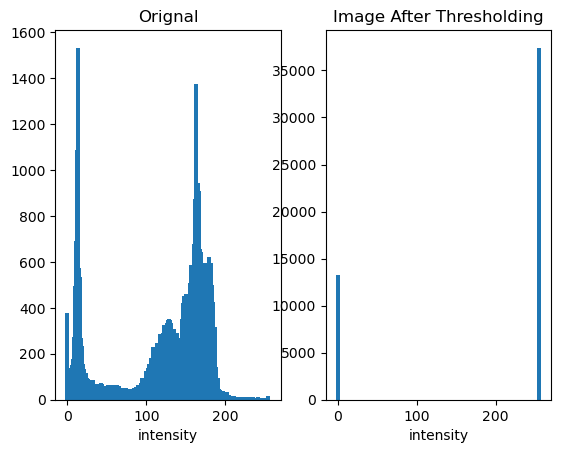

In [50]:
# apply threshold to an image:

ret, new_image = cv2.threshold(image,threshold,max_val,cv2.THRESH_BINARY)
plot_img(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

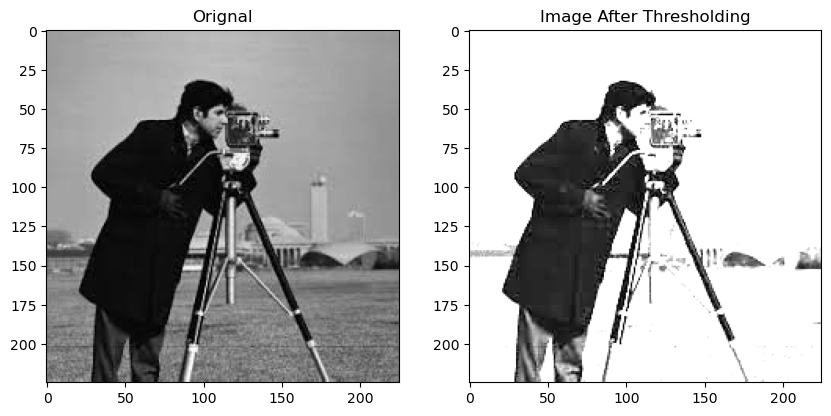

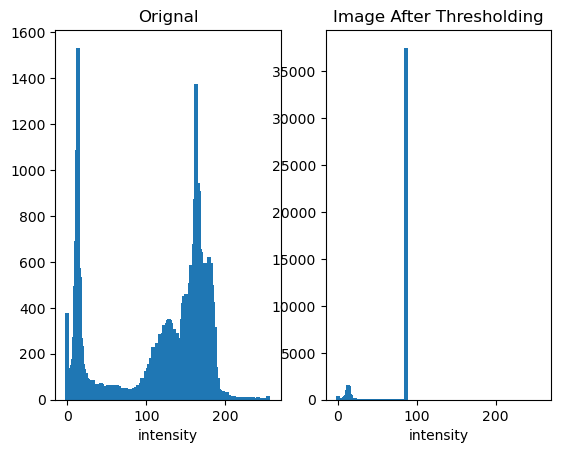

In [51]:
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_img(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

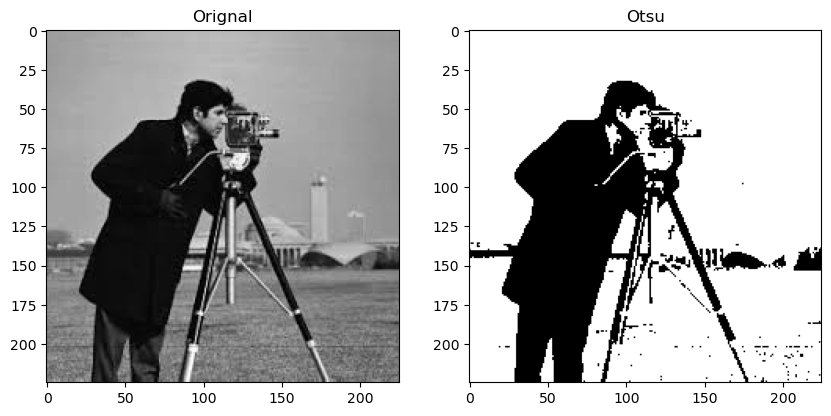

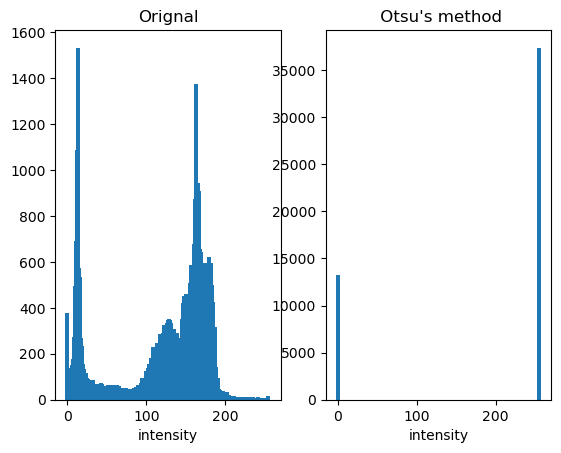

In [52]:
et, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU) # Threshold val not in the parameter list
plot_img(image,otsu,"Orignal","Otsu")
plot_hist(image, otsu,"Orignal"," Otsu's method")

In [53]:
ret

86.0